In [15]:
# import required packages
import pandas as pd
import numpy as np
import scipy
from outliers import smirnov_grubbs as grubbs
import skbio
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# set up pandas and seaborn environments
pd.set_option('display.max_rows', 25)
sns.set()
sns.set_context('notebook')
sns.set_palette('colorblind')

In [17]:
df = pd.read_csv('../data/san_diego.csv')

In [18]:
df.head()

,Date,Temp
0,2/8/2017 16:40,21.0
1,2/8/2017 16:57,20.5
2,2/8/2017 17:14,20.5
3,2/8/2017 17:31,20.0
4,2/8/2017 17:48,19.5


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.head()

,Date,Temp
0,2017-02-08 16:40:00,21.0
1,2017-02-08 16:57:00,20.5
2,2017-02-08 17:14:00,20.5
3,2017-02-08 17:31:00,20.0
4,2017-02-08 17:48:00,19.5


In [21]:
df = df.groupby('Date').mean()
df

,Temp
Date,
2017-02-08 16:36:00,21.000
2017-02-08 16:40:00,21.000
2017-02-08 16:53:00,21.000
2017-02-08 16:57:00,20.500
2017-02-08 17:10:00,20.500
2017-02-08 17:14:00,20.500
2017-02-08 17:27:00,20.500
2017-02-08 17:31:00,20.000
2017-02-08 17:44:00,20.000


In [22]:
df['Month'] = [x.month for x in df.index]
df['Year'] = [x.year for x in df.index]
df['Day'] = [x.day for x in df.index]
df.reset_index(inplace=True)

In [23]:
df

,Date,Temp,Month,Year,Day
0,2017-02-08 16:36:00,21.000,2,2017,8
1,2017-02-08 16:40:00,21.000,2,2017,8
2,2017-02-08 16:53:00,21.000,2,2017,8
3,2017-02-08 16:57:00,20.500,2,2017,8
4,2017-02-08 17:10:00,20.500,2,2017,8
5,2017-02-08 17:14:00,20.500,2,2017,8
6,2017-02-08 17:27:00,20.500,2,2017,8
7,2017-02-08 17:31:00,20.000,2,2017,8
8,2017-02-08 17:44:00,20.000,2,2017,8
9,2017-02-08 17:48:00,19.500,2,2017,8


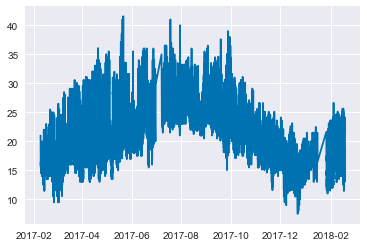

In [24]:
plt.plot(df.Date, df.Temp)

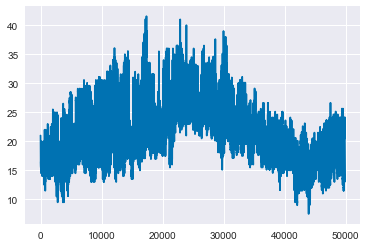

In [25]:
# make sure our index is sequential
plt.plot(df.index, df.Temp);

In [42]:
df['Month'].describe()

count    49902.000000
mean         6.414352
std          3.524336
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: Month, dtype: float64

In [43]:
df['Month']

46048     1
46219     1
46218     1
46217     1
46216     1
46215     1
46214     1
46213     1
46212     1
46211     1
46210     1
46209     1
         ..
43553    12
43552    12
43551    12
43550    12
43549    12
43548    12
43547    12
43546    12
43545    12
43544    12
43572    12
42103    12
Name: Month, Length: 49902, dtype: int64

In [45]:
df['Day']

46048    26
46219    27
46218    27
46217    27
46216    27
46215    27
46214    27
46213    27
46212    27
46211    27
46210    27
46209    27
         ..
43553    17
43552    17
43551    17
43550    17
43549    17
43548    17
43547    17
43546    17
43545    17
43544    17
43572    17
42103     8
Name: Day, Length: 49902, dtype: int64

In [47]:
df.groupby(['Month'], as_index=False).mean().sort_values('Temp')

,Month,Temp,Year,Day
11,12,15.532557,2017.000000,13.507093
0,1,16.560752,2018.000000,16.695893
1,2,16.998305,2017.463266,14.138200
10,11,18.409848,2017.000000,15.470635
2,3,18.912216,2017.000000,16.113624
3,4,20.611212,2017.000000,15.501671
9,10,21.748600,2017.000000,16.000762
4,5,21.966122,2017.000000,16.001714
5,6,23.287308,2017.000000,13.934438
8,9,24.781472,2017.000000,17.386612
